**You should fully understand the code and add code to appropriate places. You are suggested to read through all comments/annotations as they may help you understand code or indicate where you need to add code.**


**Question 1.** Below we generated a dataset. Please:
1. visualize the true function $y=\sin(\pi x)$
2. on the generated training data, do linear regression to fit the data by the np.linalg.solve function (https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). You might encounter error, and please think about why and how to fix it.
3. visualize the fitted function.


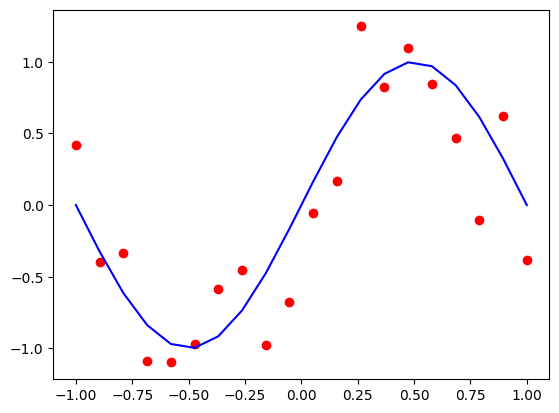

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi=math.pi

# generate 20 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,20)

# generate training target (noise contaminated!)
y=np.sin(pi*x)+0.3*np.random.randn(x.size)

# plot the training data points
plt.plot(x, y, 'ro')

# TODO: plot the true function here
y_true = np.sin(pi*x)
plt.plot(x,y_true, 'b')


(20, 2) (20,)
(20, 1)


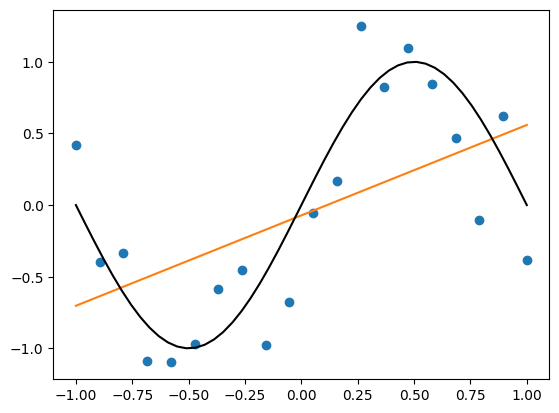

In [46]:
X = [x]
X.append(np.ones(x.shape))
X = np.array(X).T
print(X.shape, y.shape)

yy = y.reshape((20,1))
print(yy.shape)

# TODO: solve the linear system by np.linalg.solve
# theta = np.linalg.solve(X,yy)                         # X needs to be square matrix
x_new = np.dot(X.T,X)
y_new = np.dot(X.T,y)
theta = np.linalg.solve(x_new,y_new)

# TODO: get the prediction
yhat = np.dot(X,theta)

plt.plot(x,y,'o', x, yhat)

# plot the true function
plt.plot(np.linspace(-1,1,50), np.sin(2*pi*.5*np.linspace(-1,1,50)), 'black')

**Question 2**. Use the training set provided below along with the validation set to answer the following questions.

1. Gradually add features of higher degrees and solve the linear regression. How do the validation and testing errors change as you increase the number of features?
- A: The validation error sharply increases as it increases beyond a certain regularisation weight threshold, while the testing error stays constant across the different number of features.

To clarify, originally, we have 20 data points with only one scalar feature. Now, add polynomial features so you have $1, x, x^2, x^3, \ldots, x^M$, resulting in $M+1$ features (the additional one is a constant unit, representing the intercept of the line). This expansion will produce a 20-by-$(M+1)$ data matrix.

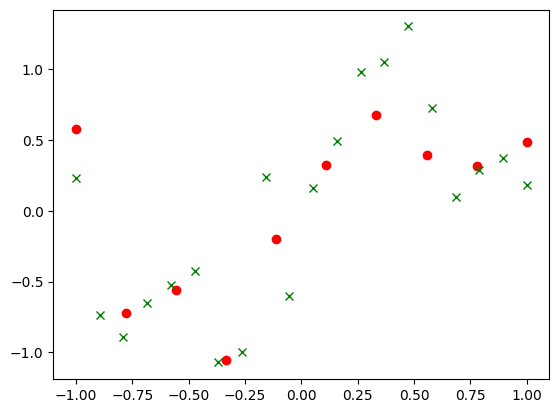

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi=math.pi
# generate 10 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,10)

# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+0.4*np.random.randn(x.size)

# define a validation set
xv=np.linspace(-1,1,20)
yv=np.sin(2*pi*.5*xv)+0.4*np.random.randn(xv.size)

plt.plot(x,y,'ro', xv, yv,'gx')                             # training: red circle; validation: green cross

(2,)
(3,)
(5,)
(9,)
(17,)
(21,)


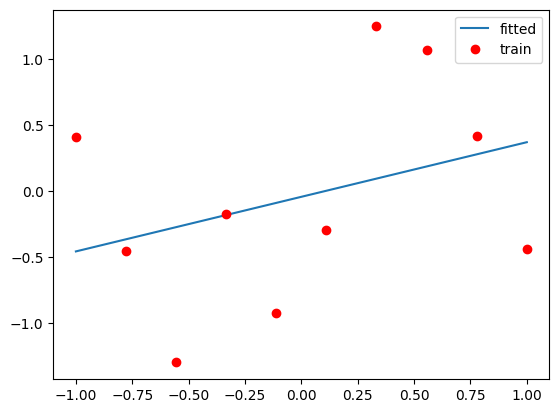

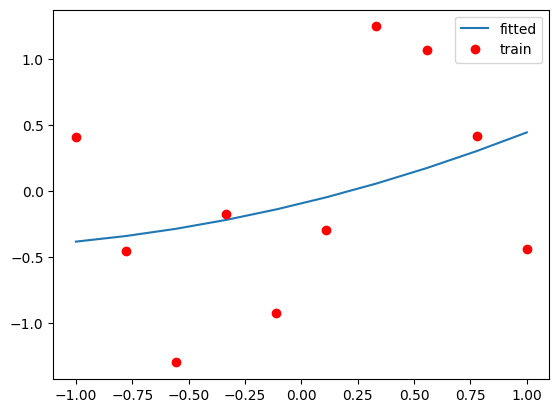

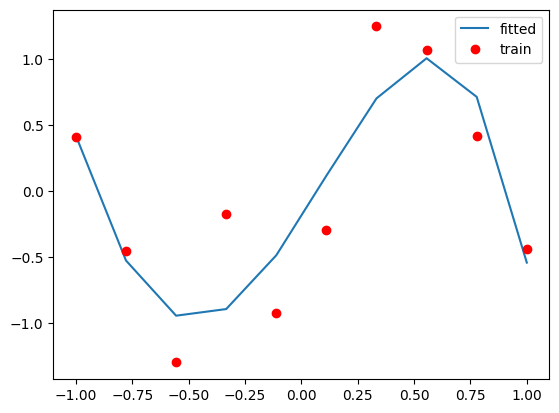

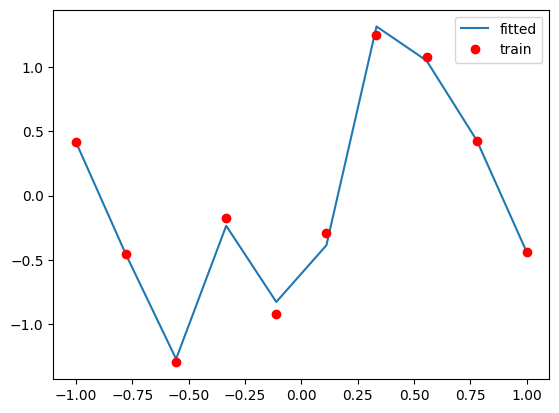

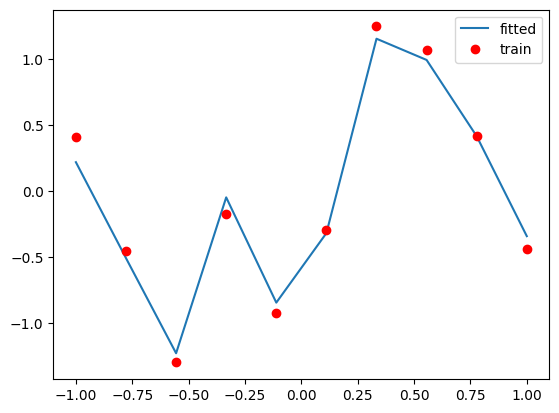

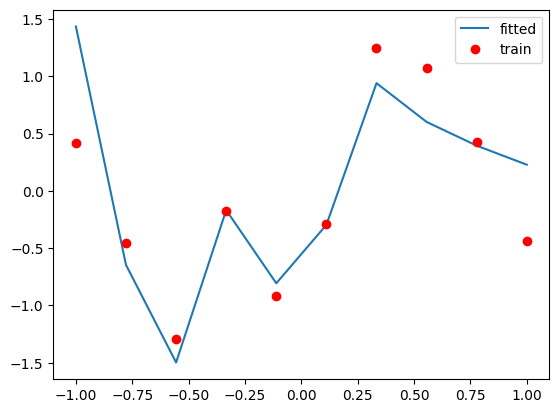

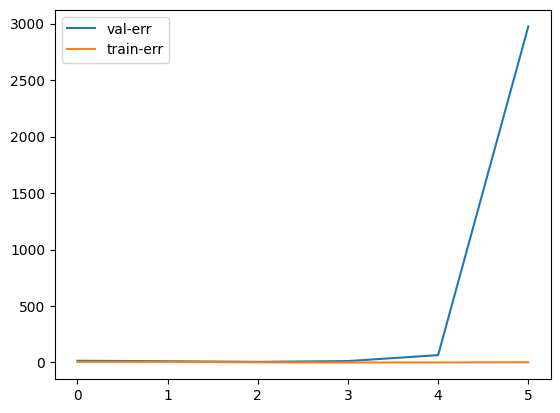

In [92]:
error_val= []
error_train = []
# try increasing number of basis
for M in [1, 2, 4, 8, 16, 20]:
  plt.figure()

  basis = np.arange(M+1)

  # TODO: create feature with polynomial basis: so the 1st column is 1, 2nd is x, 3rd is x^2, x^3, ...
  # You are suggested to USE broadcasting,instead of for loop to generate X
  # [1, x, x^2, ...]

  ax = x[:, None]
  X = np.power(ax,basis)

  # TODO: get the solution with regularization term (you can simply set reg=0 to remove the regularization effect)
  reg = 0.000001
  A = np.dot(X.T,X)
  inv = np.linalg.inv(A)
  theta = np.dot(inv,np.dot(X.T,y))
  print(theta.shape)
  yhat = np.dot(X,theta)
  # plot the fitted function
  plt.plot(x,yhat, label='fitted')

  # plot the train and validation data
  plt.plot(x,y,'ro', label='train')

  # show labels
  plt.legend()

  # compute val error and train error
  # TODO: use the same polynomial feature for validation dataset to get Xv
  Xv = np.linspace(-1,1,20)
  aXv = Xv[:, None]
  aXv_new = np.power(aXv,basis)
  # TODO: get predictions on the validation data
  yhat_val = np.dot(aXv_new, theta) +0.4*np.random.randn(Xv.size)
  error = np.sum((yv - yhat_val)**2)
  error_t = np.sum((y - yhat)**2)

  error_val.append(error)
  error_train.append(error_t)

# visualize how validation error changes as we increase basis
plt.figure()
plt.plot(error_val, label='val-err')
plt.plot(error_train, label='train-err')
plt.legend()

2. Using a fixed number of basis functions, say $M=10$, test with different regularization weights: $0, 0.0001, 0.001, 0.01, 0.1$. Repeat the procedure described in above question and observe the changes in validation error. Additionally, print out the norm of the solution for each regularization weight.

Questions to answer:
- How does the validation error change with different regularization weights?
* A: For a regularisation weight of 0, the validation error is very high at approximately 29. As the regularisation weight increases to the range of 0.0001 to 0.1, the validation error stays relatively constant at an average of approximately 8.

- What do you observe about the norms of the solutions?
* A: The norm of the solution decreases as the regularisation weight is increased.

- Why do you think the norm changes in the way it does as the regularization weight increases?
* A: The regularisation term penalises large values of the coefficient (theta). When the regularisation weight is increased, there is a greater penalty for having larger coefficients. Hence, the optimisation process will prefer solutions where the coefficient is smaller. Thus, the norm of the solution decreases as the regularisation weight is increased.

Regularization weight 0, norm of theta: 384.86515714469004
Regularization weight 0.0001, norm of theta: 27.734577401836578
Regularization weight 0.001, norm of theta: 10.096499952365292
Regularization weight 0.01, norm of theta: 2.96295166911679
Regularization weight 0.1, norm of theta: 1.3498867619620198


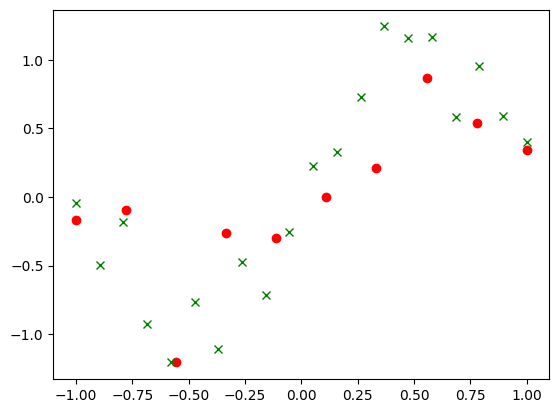

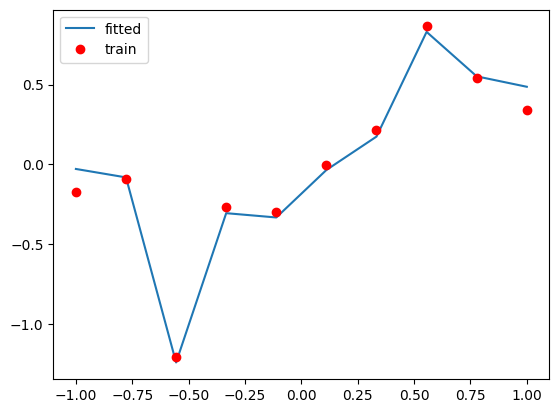

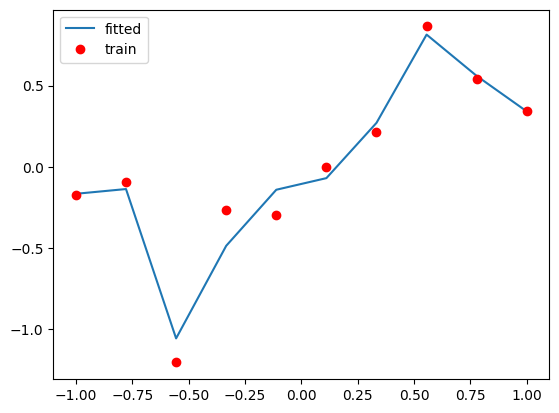

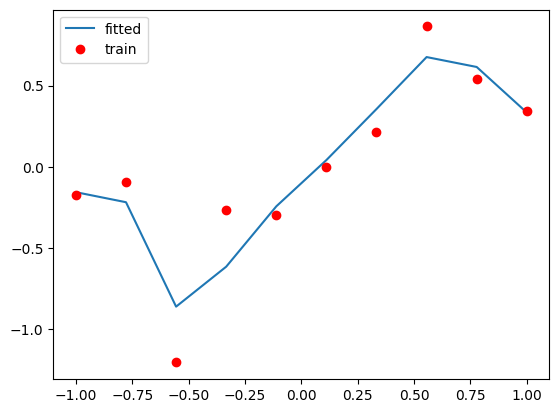

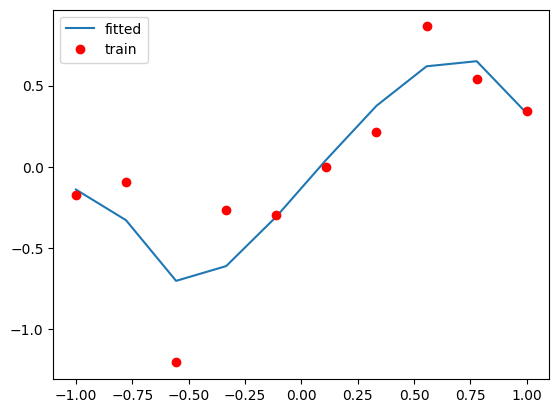

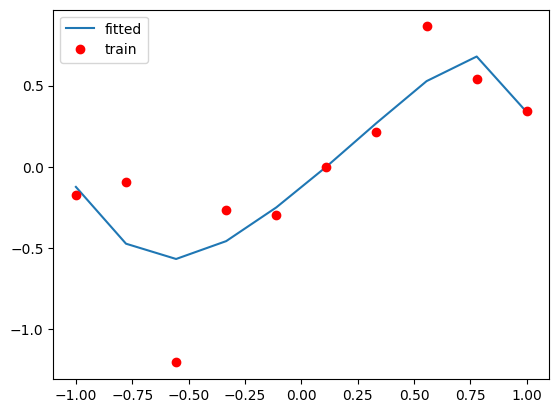

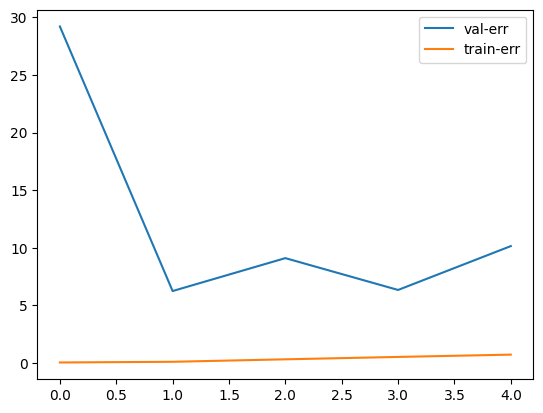

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi=math.pi
# generate 10 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,10)

# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+0.4*np.random.randn(x.size)

# define a validation set
xv=np.linspace(-1,1,20)
yv=np.sin(2*pi*.5*xv)+0.4*np.random.randn(xv.size)

plt.plot(x,y,'ro', xv, yv,'gx')                             # training: red circle; validation: green cross


error_val= []
error_train = []
M = 10 

# Try different regularisation weights
for reg in [0, 0.0001, 0.001, 0.01, 0.1]:
  plt.figure()

  basis = np.arange(M+1)
  # TODO: create feature with polynomial basis: so the 1st column is 1, 2nd is x, 3rd is x^2, x^3, ...
  # You are suggested to USE broadcasting,instead of for loop to generate X
  # [1, x, x^2, ...]

  ax = x[:, None]
  X = np.power(ax,basis)

  # TODO: get the solution with regularization term (you can simply set reg=0 to remove the regularization effect)
  A = np.dot(X.T,X)
  inv = np.linalg.inv(A+reg*np.identity(M+1))
  theta = np.dot(inv,np.dot(X.T,y))
  print(f'Regularization weight {reg}, norm of theta: {np.linalg.norm(theta)}')

  yhat = np.dot(X,theta)
  # plot the fitted function
  plt.plot(x,yhat, label='fitted')

  # plot the train and validation data
  plt.plot(x,y,'ro', label='train')

  # show labels
  plt.legend()

  # compute val error and train error
  # TODO: use the same polynomial feature for validation dataset to get Xv
  Xv = np.linspace(-1,1,20)
  aXv = Xv[:, None]
  aXv_new = np.power(aXv,basis)
  # TODO: get predictions on the validation data
  yhat_val = np.dot(aXv_new, theta) +0.4*np.random.randn(Xv.size)
  error = np.sum((yv - yhat_val)**2)
  error_t = np.sum((y - yhat)**2)

  error_val.append(error)
  error_train.append(error_t)

# visualize how validation error changes as we increase basis
plt.figure()
plt.plot(error_val, label='val-err')
plt.plot(error_train, label='train-err')
plt.legend()

3. Increase the number of basis: ($1, 5, 10, 15, 20$), check the norm of weight again. What do you find and why? Note: you should divide the $l2$ norm by the square root of number of columns to get a fair comparison.

* A: The norm of theta is significantly larger at M=10 and M=20. This is because the model is likely overfitting the training data, resulting in larger weights to capture the details of the data. As for the dip in norm of theta at M=15, it could be due to the particular alignment of data that results in less overfitting.

(2,)
M=1, norm of theta: 0.407983935563639
(6,)
M=5, norm of theta: 1.3125506938120537
(11,)
M=10, norm of theta: 116.04121101182778
(16,)
M=15, norm of theta: 36.637590517414516
(21,)
M=20, norm of theta: 431.4973254538045


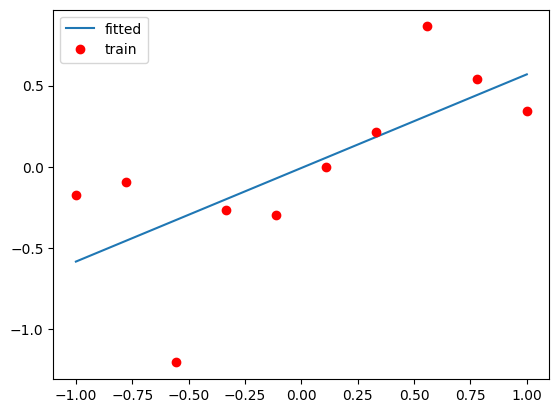

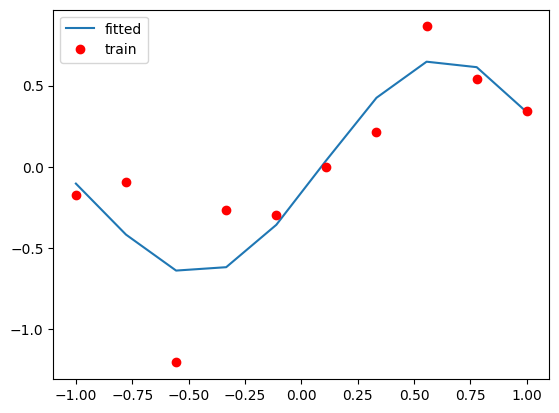

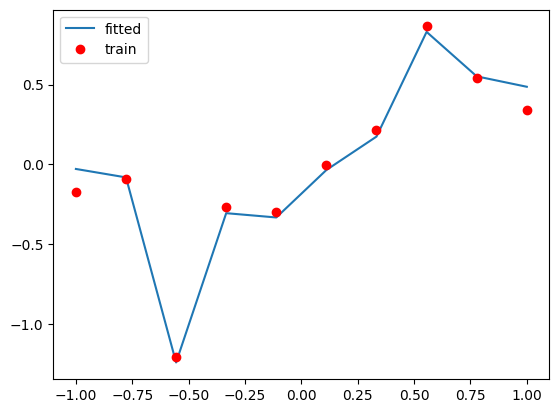

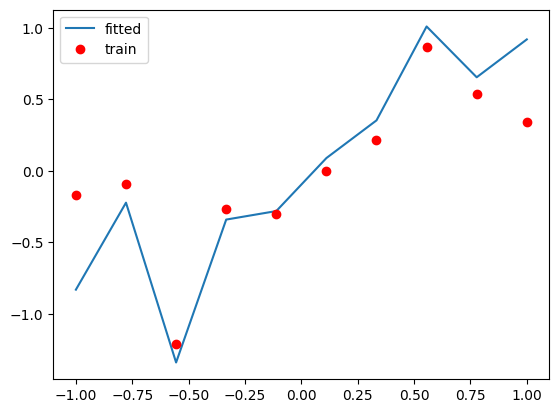

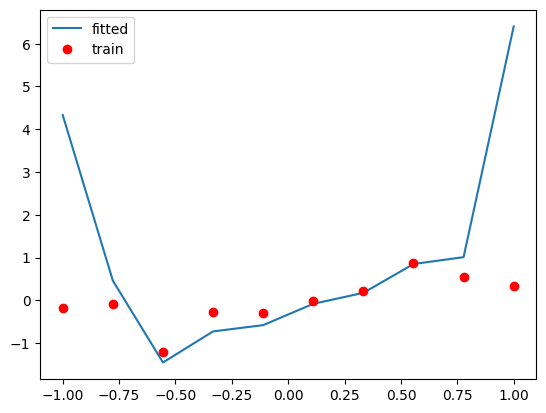

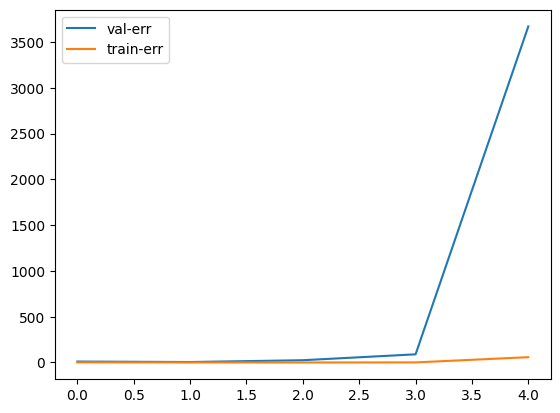

In [106]:
import math

error_val= []
error_train = []
# try increasing number of basis
for M in [1, 5, 10, 15, 20]:
  plt.figure()

  basis = np.arange(M+1)

  # TODO: create feature with polynomial basis: so the 1st column is 1, 2nd is x, 3rd is x^2, x^3, ...
  # You are suggested to USE broadcasting,instead of for loop to generate X
  # [1, x, x^2, ...]

  ax = x[:, None]
  X = np.power(ax,basis)

  # TODO: get the solution with regularization term (you can simply set reg=0 to remove the regularization effect)
  reg = 0.000001
  A = np.dot(X.T,X)
  inv = np.linalg.inv(A)
  theta = np.dot(inv,np.dot(X.T,y))
  print(theta.shape)
  print(f'M={M}, norm of theta: {np.linalg.norm(theta)/math.sqrt(M+1)}')

  yhat = np.dot(X,theta)
  # plot the fitted function
  plt.plot(x,yhat, label='fitted')

  # plot the train and validation data
  plt.plot(x,y,'ro', label='train')

  # show labels
  plt.legend()

  # compute val error and train error
  # TODO: use the same polynomial feature for validation dataset to get Xv
  Xv = np.linspace(-1,1,20)
  aXv = Xv[:, None]
  aXv_new = np.power(aXv,basis)
  # TODO: get predictions on the validation data
  yhat_val = np.dot(aXv_new, theta) +0.4*np.random.randn(Xv.size)
  error = np.sum((yv - yhat_val)**2)
  error_t = np.sum((y - yhat)**2)

  error_val.append(error)
  error_train.append(error_t)

# visualize how validation error changes as we increase basis
plt.figure()
plt.plot(error_val, label='val-err')
plt.plot(error_train, label='train-err')
plt.legend()

**Question 3.** Assume you have previously trained a linear regression model on a dataset $(X, y)$ using a regularization weight. However, the feature matrix $X$, an $n$-by-$d$ matrix, is accidentally contaminated with zero-mean Gaussian noise. This noise is independent of the data and has a reasonably small constant variance. Consequently, your feature matrix becomes $X + \epsilon$, where $\epsilon$ is an $n$-by-$d$ matrix with entries independently sampled from the same Gaussian distribution. You may wonder if you should be concerned about significant changes in your solution. Please provide mathematical reasoning to support your answer. Additionally, you may consider conducting empirical tests to further investigate your opinion or conjecture.

Hint: To simplify your analysis, considering the effect of adding such noise to a single training example may be sufficient.

* A: The values we have computed above are the sum of squares of the error between fitted and validation data with noise and no noise respectively. It is observed that the values are very similar, with no significant changes. This is mainly attributed by the fact that in the latter case, the feature matrix is contaminated with zero-mean gaussian noise that also has a reasonably small constant variance. Thus, does not contribute to large error. Instead, if there is a non-zero mean gaussian noise, the entire validation dataset would be shifted by that non-zero amount, contributing to a large error when the sum of squares is calculated.

In [74]:
# DO NOT change the code in this cell
import pandas as pd
import numpy as np
np.random.seed(0)
fileloc = 'https://raw.githubusercontent.com/yannickycpan/oxford-engs-AIML-cwm/main/realestate.txt'
dataset = pd.read_csv(fileloc)
dataset = dataset.values
np.random.shuffle(dataset)
print(dataset.shape)
tn = 300
X, y = dataset[:tn,:-1], dataset[:tn,-1]
Xval, yval = dataset[tn:,:-1], dataset[tn:,-1]
print(X.shape, y.shape)

(413, 5)
(300, 4) (300,)


In [88]:
np.random.seed(0)

reg=0.1
sig = 0.01

# TODO: compute the solution on the original dataset with regularization weight reg=0.1
A = np.dot(X.T,X)
inv = np.linalg.inv(A+reg*np.identity(4))
theta = np.dot(inv, np.dot(X.T,y))

# add noise to the dataset
NX = X + np.random.normal(0., sig, X.shape)
# TODO: compute the solution using the perturbed dataset
# you might test the solution with and without regularization
A_noise = np.dot(NX.T, NX)
inv_noise =np.linalg.inv(A+reg*np.identity(4))
ntheta = np.dot(inv, np.dot(NX.T,y))                                        # with regularisation
# ntheta = np.dot(np.linalg.inv(np.dot(NX.T,NX)),np.dot(NX.T,y))            # without regularisation

## print out the validation error on both original and perturbed data
print(np.sum((Xval@theta-yval)**2), np.sum((Xval@ntheta-yval)**2))          # @ is the same as np.dot(x,y)

12840.189877847446 12858.820615433195
